In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df_train = pd.read_csv('./archive/mnist_train.csv')
df_test = pd.read_csv('./archive/mnist_test.csv')

df_train.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [3]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(df_train.iloc[0,:])

label    5
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Name: 0, Length: 785, dtype: int64


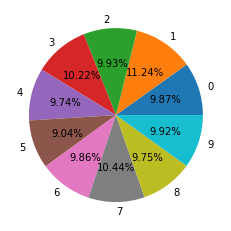

In [14]:
classes = df_train.groupby('label')['label'].count()
plt.pie(classes, labels=classes.index, autopct='%.2f%%')
plt.show()

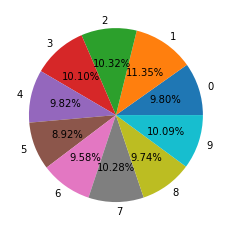

In [15]:
classes = df_test.groupby('label')['label'].count()
plt.pie(classes, labels=classes.index, autopct='%.2f%%')
plt.show()

In [7]:
def euc_dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [8]:
x_train = df_train.loc[ : , df_train.columns != 'label']
y_train = df_train['label']

print(x_train.shape)
print(y_train.shape)

(60000, 784)
(60000,)


In [9]:
x_test = df_test.loc[ : , df_test.columns != 'label']
y_test = df_test['label']

print(x_test.shape)
print(y_test.shape)

(10000, 784)
(10000,)


In [10]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [11]:
y_predicted = neigh.predict(x_test)
cmat = confusion_matrix(y_test, y_predicted)

<AxesSubplot:>

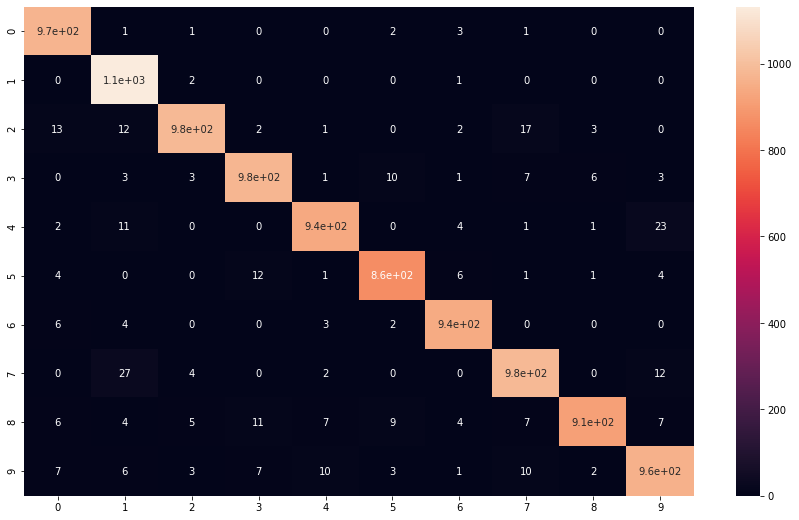

In [13]:
fig, axs = plt.subplots(nrows=1)
fig.set_size_inches(15, 9)
sns.heatmap(cmat, annot=True)

In [12]:
accuracy = accuracy_score(y_test, y_predicted)
print('Model accuracy : ', accuracy)

metric_score = precision_recall_fscore_support(y_test, y_predicted, average='macro')

metric_name = ['precision', 'recall', 'fscore']

for i in range(0, 3):
    print('Model ' + metric_name[i] + ' : ' + str(metric_score[i]))

Model accuracy :  0.9665
Model precision : 0.9672582633007047
Model recall : 0.966220300053584
Model fscore : 0.9665500363451924
